In [82]:
%reload_ext autoreload
%autoreload 2

from agents import *
from Environments import RaceTrack, track_easy, track_hard, track_challenge, track_impossible
from IPython.display import Image

In [89]:
track = RaceTrack(track_impossible)

alpha = 0.5
epsilon = 0.00

agent_params = {
    "num_states": track.num_states,
    "num_actions": track.num_actions,
    "gamma": 1.0,
    "alpha": alpha,
    "epsilon": epsilon,
    "schedules": {
        "alpha": linear_schedule(alpha, 0),
        "epsilon": up_down_schedule(epsilon, 0.05),
    },
    "plan_steps": 0,
    "n_steps": 2,
}

agent = AgentState(**agent_params)

In [ ]:
ep_lengths = train(agent, track, num_episodes=100_000, update_fn=nstep_sarsa_update_fn(True))

Episodes:  16%|#5        | 15528/100000 [00:00<?, ?it/s]

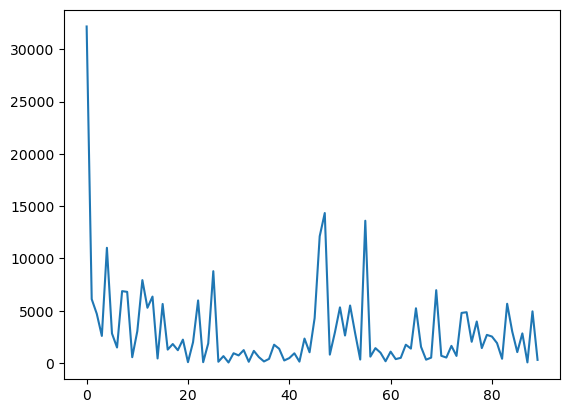

In [91]:
import matplotlib.pyplot as plt

plt.plot(ep_lengths[10:100])
plt.show()

In [ ]:
episode, _, _ = play_episode(agent, track, max_steps=100)
print("Episode finished! Rendering animation...")
ep_name = "testing"
filename = track.render_episode(episode, ep_name=ep_name)
Image(filename)